In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

2016-08-23


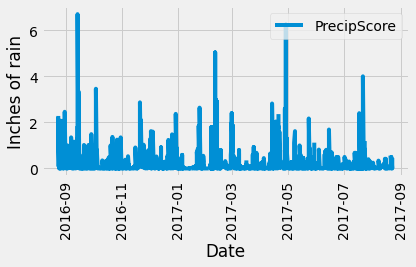

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
test = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

datetest = datetime.strptime(test[0], "%Y-%m-%d").date()
type(datetest)
# Starting from the most recent data point in the database. 
# most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# # Calculate the date one year from the last date in data set.
year_ago = datetest - dt.timedelta(days=365)
print(year_ago)
# Perform a query to retrieve the data and precipitation scores
# session.query = 
datestrings = session.query(Measurement.date).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

dates = []
for onedate in datestrings:
    convert = datetime.strptime(onedate[0], "%Y-%m-%d").date()
    dates.append(convert)

measurements = session.query(Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

measures = []
for onemeasure in measurements:
    measures.append(onemeasure[0])

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame({'Date': dates, 'PrecipScore' : measures})
df.set_index('Date', inplace=True)
df

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.ylabel('Inches of rain')
plt.tight_layout()
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,PrecipScore
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()